In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import time

from scipy.stats import ks_2samp

from astropy.io import fits,ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
homedir = os.getenv("HOME")

In [4]:
MIN_SSFR = -11.5
MAX_BT = 0.2

# Expanded Sample Size #

I realized at the 11th hour that we are artificially cutting the sample for paper 2 based on the location of the MIPS scans in paper 1.  We are not using anything about the MIPS data here, so this doesn't make sense


* started with ~/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-vizier.fits
  * GSWLC
  * no DR10 AGN
  * Simard tab1
  
  
* match to Simard table 3 (we need ellipticity from simard+2011 table 3)
  * Simard tab3 ~/research/Simard2011/Simard2011-table3-vizier.fits
  * matching parameters
      * 10 arc offset
      * Best match, symmetric
      * join type: 1 and 2
  * 615299 pairs
  * save as ~/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-vizier.fits

* match to A100
  * match result of above to ~/research/APPSS/tables/A100-HIdef-28-Aug-2021.fits
  * A100 (didn't limit sample based on this - just added columns for those in A100)
    * 10 arcsec offset
    * Best match symmetric 
    * join type- All from 1 (tab1  = GSWLC+Simard table)
    * 14277 matches
  * write this as homedir+'/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-vizier-A100-HIdef-28Aug2021.fits'
  
* wrote program to grab galaxies within
  * $\Delta v/\sigma < 3$
  * $\Delta r/R_{200} < 3$
  
* saved file as
  * /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100.fits
  

In [48]:
os.chdir('/home/rfinn/research/LCS/tables/')
%run ~/github/LCS/python/getLCScat.py 


number of matches in MKW11 = 86
number of matches in MKW8 = 170
number of matches in AWM4 = 58
number of matches in A2063 = 355
number of matches in A2052 = 224
number of matches in NGC6107 = 176
number of matches in Coma = 972
number of matches in A1367 = 462
number of matches in Hercules = 531

total sample size = 3034
total sample size = 2955


<Figure size 489.6x360 with 0 Axes>

# match to LCSsizes in topcat


* match LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100.fits
* to LCS_all_size_KE_sfr.fits (in research/LCS/tables directory, again adding columns but not requiring a match)
  * topcat parameters
      * 10 arcsec offset
      * best match, symmetric
      * all from 1
  * 1291/1800 galaxies from paper1 sample are matched
  * saved as /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes.fits (2955 rows)
  
* save as /home/rfinn/research/LCS/tables/LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes.fits

In [ ]:
# in topcat

# Program to fix colnames so they are the same as in original file

```
intab.rename_column('DR_R200_1','DR_R200')

```

In [49]:
os.chdir('/home/rfinn/research/LCS/tables/')
%run ~/github/LCS/python/LCSfix_colnames_forv2.py

In [50]:
os.chdir('/home/rfinn/research/LCS/tables/')
fixtab = Table.read('LCS-GSWLC-NODR10AGN-Simard-tab1-tab3-A100-LCSsizes-fixednames.fits')

# Run analysis

* created a new version of program in case all hell breaks loose
  * lcs_paper2_v2.py

In [68]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number of core galaxies =  194
	 with size measurements =  66
number of infall galaxies =  433
	 with size measurements =  53
number of GSW galaxies =  11900


In [70]:
lcsBTflag = b.lcs.cat['__B_T_r'] < 0.4

print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & lcsBTflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & lcsBTflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

number of core galaxies =  112
	 with size measurements =  66
number of infall galaxies =  284
	 with size measurements =  53
number of GSW galaxies =  11900


In [79]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75 --HIdef --minssfr MIN_SSFR
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number of core galaxies =  115
	 with size measurements =  54
number of infall galaxies =  289
	 with size measurements =  45
number of GSW galaxies =  8872


<Figure size 489.6x360 with 0 Axes>

# Statistics for Table 1

In [147]:

# checking to see where we lose the difference between mass distributions
# mass distributions are different only at the lowest mass end
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip .75 --minssfr MIN_SSFR
b.ks_stats()


print()
print('#################################################')
print('#################################################')
print('WITH MASS MATCHING')
print('#################################################')
print('#################################################')
b.ks_stats(massmatch=True)

%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .4 --minmass 9.7 --ellip .75
b.ks_stats()

print()
print('#############################################')
print('WITH MASS MATCHING')
print('#############################################')
b.ks_stats(massmatch=True)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11

#################################################
#################################################
WITH MASS MATCHING
#################################################
#################################################
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
162

In [ ]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

In [26]:
%%time
# redoing without mass match, and using Anderson Darling
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats-nomassmatch.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.17e-01, pvalue = 4.24e-17
	AD D = 7.73e+01, pvalue = 1.00e-03

LCS Core vs Field: dSFR
	D = 3.16e-01, pvalue = 5.40e-17
	AD D = 7.40e+01, pvalue = 1.00e-03

LCS Core vs Field: Mstar
	D = 1.23e-01, pvalue = 6.17e-03
	AD D = 5.95e+00, pvalue = 1.60e-03

LCS Core vs Field: BT
	D = 2.11e-01, pvalue = 8.39e-08
	AD D = 5.95e+00, pvalue = 1.60e-03
########################################
LCS Infall vs Field: SFR
	D = 2.31e-01, pvalue = 1.02e-19
	AD D = 6.29e+01, pvalue = 1.00e-03

LCS Infall vs Field: dSFR
	D = 2.32e-01, pvalue = 5.65e-20
	AD D = 6.11e+01, pvalue = 1.00e-03

LCS Infall vs Field: Mstar
	D = 4.27e-02, pvalue = 4.31e-01
	AD D = 1.11e+00, pvalue = 1.14e-01

LCS Infall vs Field: BT
	D = 1.46e-01, pvalue = 3.97e-08
	AD D = 1.71e+01, pvalue = 1.00e-03

########################################
LCS Core vs Infall: SFR
	D = 1.43e-01, pvalue = 7.22e-03
	AD D = 6.27e+00, pvalue = 1.25e-03
LCS Core vs Infall: dSFR
	D =

### Trying Anderson-Darling Test

In [22]:
%%time

os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/writelatexstats.py

t = writetable()
t.read_tables()
t.open_output()
t.get_stats()
t.write_header()
t.write_data()
t.write_footer()
t.close_output()

########################################
LCS Core vs Field: SFR
	D = 3.17e-01, pvalue = 4.24e-17
Anderson_ksampResult(statistic=77.25191113221709, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: dSFR
	D = 3.16e-01, pvalue = 5.40e-17
Anderson_ksampResult(statistic=74.02431097166408, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

LCS Core vs Field: Mstar
	D = 1.23e-01, pvalue = 6.17e-03
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)

LCS Core vs Field: BT
	D = 2.11e-01, pvalue = 8.39e-08
Anderson_ksampResult(statistic=5.953642675951121, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.0016038571241014919)
########################################
LCS Infall vs Field: SFR
	D = 2.31e-01, pvalue = 1.02e-19

KeyboardInterrupt: 

# Figure 1

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.49
Best-fit inter = -5.13
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.49+/-0.01
Best-fit inter = -5.13+/-0.10
number in lcs sample =  146
number in gsw sample =  11110
just checking ... 7300 146
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 5.663e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 3.104e-06 (prob that samples are from same distribution)


number in lcs sample =  374
number in gsw sam

<Figure size 489.6x360 with 0 Axes>

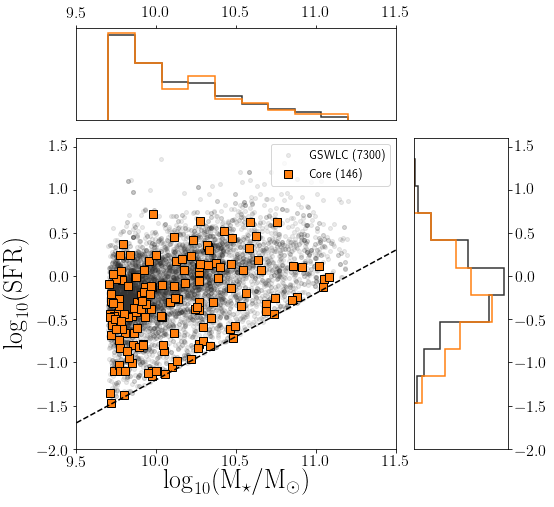

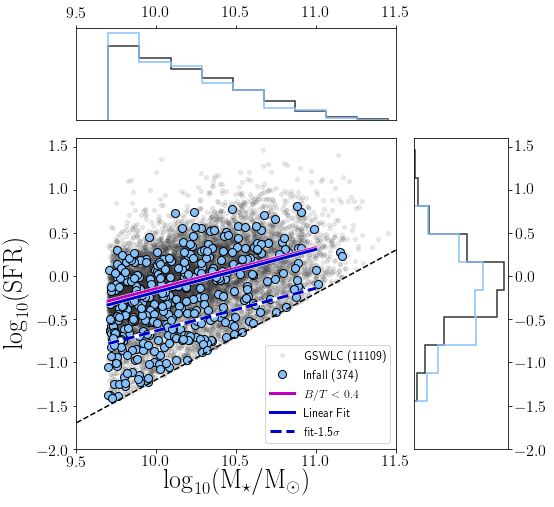

In [32]:

os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.2



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=False,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False,marker2='s')

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
#plt.figure()
#make_venn()

### with BT < 0.4 cut

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in lcs sample =  115
number in gsw sample =  8872
just checking ... 8872 115
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.14
p-vale = 2.876e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.25
p-vale = 1.310e-06 (prob that samples are 

<Figure size 489.6x360 with 0 Axes>

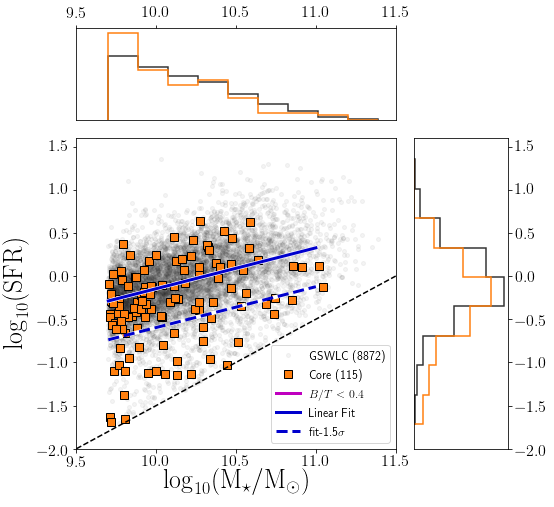

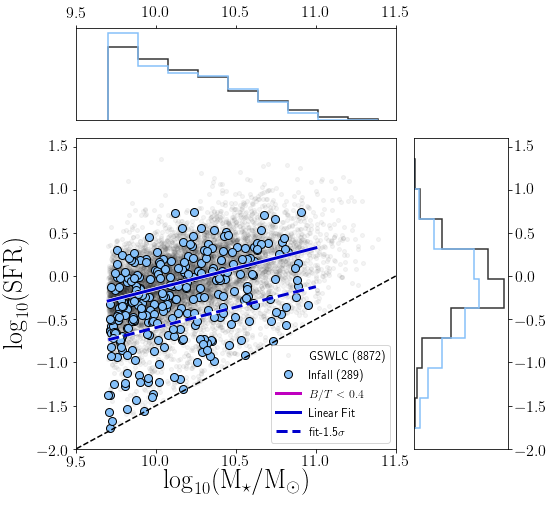

In [35]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --cutBT --BT 0.4 --minssfr MIN_SSFR



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False,marker2='s')

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
#plt.figure()
#make_venn()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.2
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
967 967 967 967
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.61
Best-fit inter = -6.22
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.61+/-0.01
Best-fit inter = -6.22+/-0.11
number in lcs sample =  63
number in gsw sample =  6205
just checking ... 6205 63
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 2.618e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 1.263e-04 (prob that samples are from s

<Figure size 489.6x360 with 0 Axes>

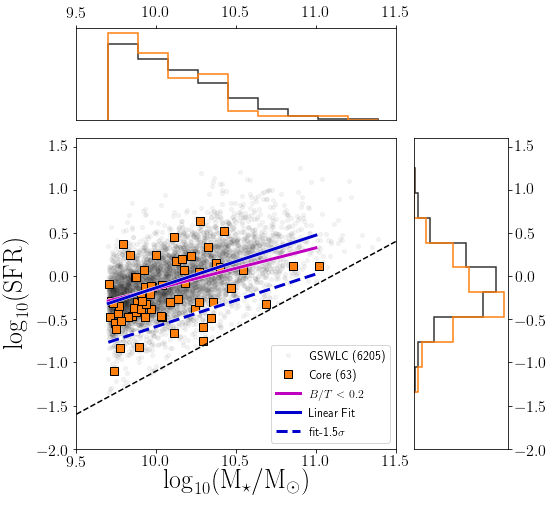

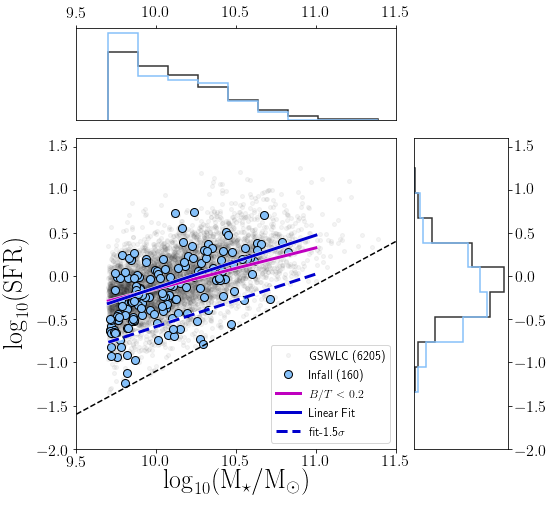

In [10]:
# with sSFR > -11.1
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --cutBT --BT 0.2 --minssfr MIN_SSFR



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,coreflag=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=False,marker2='s')

print("")
print("")
flag = b.lcs.infallflag #& irflag
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut0p4-e0p75.png'
b.plot_sfr_mstar(lcsflag=flag,label='Infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=False)
# make venn plot
#plt.figure()
#make_venn()

# Figure 2

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.23
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.23 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59

Field: median = -0.0055-0.0015+0.0038 (bootstrap)
Field: mean, std, std_err = -0.2019,0.7091,0.0044 


Core: median = -0.1431-0.0392+0.0375 (bootstrap)
Core: mean, std, std_err = -0.1744,0.4319,0.0357 


Infall: median = -0.1277-0.0510+0.0621 (bootstrap)
Infall: mean, std, std_err = -0.1416,0.4138,0.0214 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.16261485774499473, pvalue=0.0009254185491521

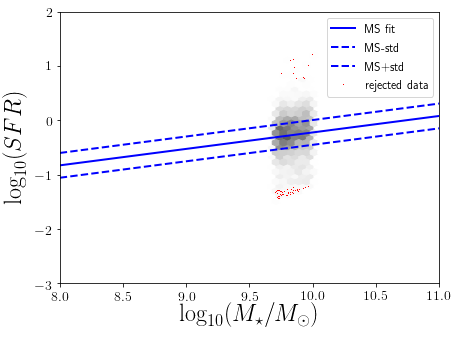

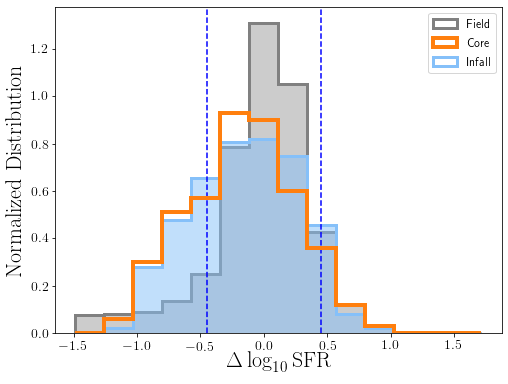

In [47]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.2
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut1-e0p75-mmatch.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2,massmatch=True)

# Figure 3

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
CORE
frac suppressed = 0.438, -0.035,0.036
INFALL
0.325635103926097 [-0.02209593  0.02289945]
FIELD
0.1446218487394958 [-0.00319435  0.00325407]
(2,)

#####  WITH BT CUT  ######

CORE
frac suppressed = 0.268, -0.040,0.044
INFALL
0.2640845070422535 [-0.02529874  0.02695429]
FIELD
0.08849052295044531 [-0.00298799  0.00308195]
(2,)


<Figure size 489.6x360 with 0 Axes>

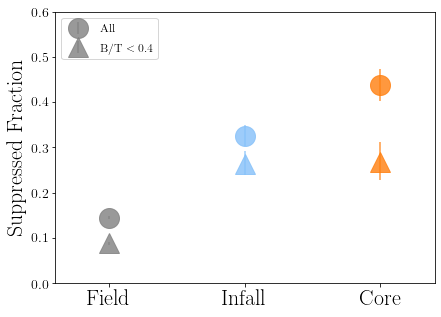

In [42]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr MIN_SSFR
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
b.plot_frac_suppressed()#outfile1=outfile1,outfile2=outfile2,nbins=12)
print()
print('#####  WITH BT CUT  ######')
print()
btcut = 0.4
b.plot_frac_suppressed(BTcut=btcut,plotsingle=False)
plt.ylim(0,.6)
plt.legend([r'$\rm All$','_nolegend_','_nolegend_',r'$\rm B/T<0.4$'],loc='upper left')
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 4

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
Field : number of galaxies in normal sf subsample =  10179
2 2 3
Field : number of galaxies in suppressed sf subsample =  1721

Core : number of galaxies in normal sf subsample =  109
2 2 3
Core : number of galaxies in suppressed sf subsample =  85

Infall : number of galaxies in normal sf subsample =  292
2 2 3
Infall : number of galaxies in suppressed sf subsample =  141

Field : number of galaxies in normal sf subsample =  10179
2 2 6
Field : number of

<Figure size 489.6x360 with 0 Axes>

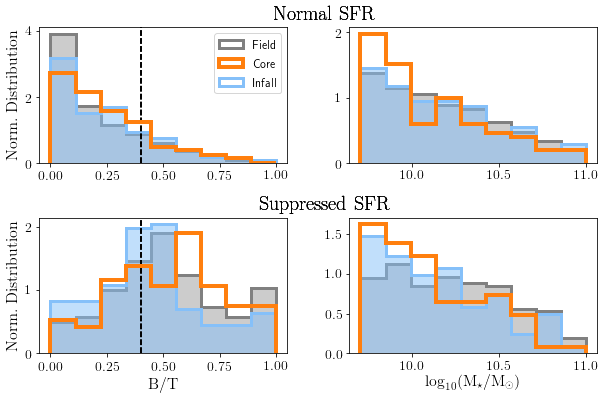

In [40]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75  --minssfr MIN_SSFR

b.compare_morph(nbins=10,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 5

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.5031958163858222, pvalue=1.53738209665563e-198)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.04549676422484933, pvalue=0.004510983942156796)


<Figure size 489.6x360 with 0 Axes>

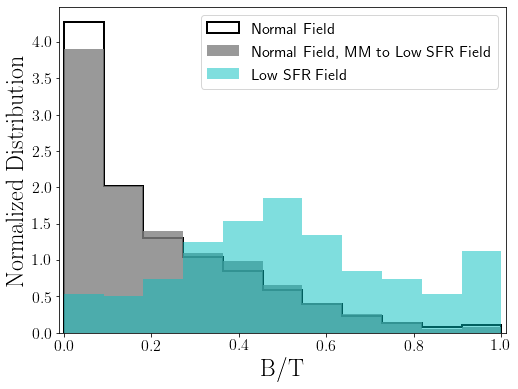

In [44]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --minssfr MIN_SSFR

b.compare_BT_lowsfr_field(nbins=12,BTmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# Figure 6

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.53
Best-fit inter = -5.52
Width of the MS = 0.21 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.53+/-0.01
Best-fit inter = -5.52+/-0.10
#########################
Without Sersic cut
#########################

Field
r=nan, pvalue=nan

Core
r=-0.2209, pvalue=1.122e-02

Infall
r=nan, pvalue=nan

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

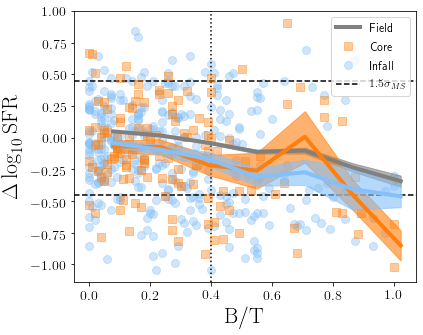

In [12]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=1.1
nbins=8

#btmax=1
#nbins=7
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --ellip 0.75 --minssfr -11.1

print('#########################')
print('Without Sersic cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10,BTline=.4)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BTcut1-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)


# Figure 7

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10

Field: median = -0.0007-0.0038+0.0041 (bootstrap)
Field: mean, std, std_err = -0.0145,0.3389,0.0036 


Core: median = -0.1664-0.0357+0.0146 (bootstrap)
Core: mean, std, std_err = -0.2126,0.4520,0.0422 


Infall: median = -0.1375-0.0415+0.0261 (bootstrap)
Infall: mean, std, std_err = -0.2049,0.4530,0.0266 

KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.24191986513506097, pval

<Figure size 489.6x360 with 0 Axes>

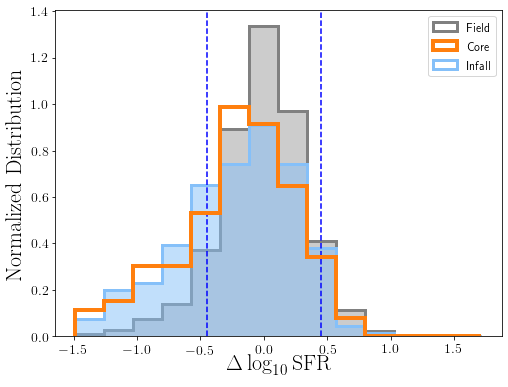

In [48]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT .4 --minmass 9.7 --ellip 0.75 
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist-BTcut0p4-e0p75.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# Figure 8

* can't make right now b/c did not propagate tempel into LCS catalog :(

* added tempel to LCS catalog, so pSc is available

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10

TESTING


TESTING

###################################################################
comparing LCS low SFR and mass-matched field low SFR: $\rm B/T$
statistic=0.12, pvalue=2.77e-01

anderson-darling test
Anderson_ksampResult(statistic=0.49306366940665114, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.2079482562855823)
################

<Figure size 489.6x360 with 0 Axes>

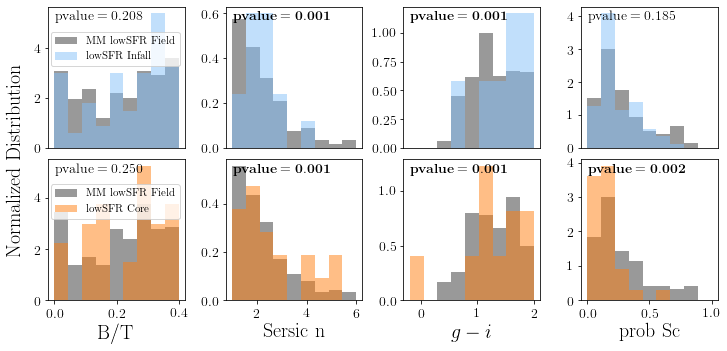

In [82]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.4
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --ellip 0.75  
#b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,BTmax=btmax)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

print()
print('TESTING')
print()
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=.3,bottom=.2,hspace=.08)



print()
print('TESTING')
print()
b.compare_BT_lowsfr_field_core(nbins=10,coreonly=False,infallonly=True,BTmax=btmax,plotsingle=False,nrow=2,show_xlabel=False)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsinfall-mmfield-BTcut0p4-e0p75.png'

b.compare_BT_lowsfr_field_core(nbins=10,coreonly=True,BTmax=btmax,plotsingle=False,nrow=2,subplot_offset=4)
#outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-BTcut0p4-e0p75.png'
#plt.savefig(outfile1)
#plt.savefig(outfile2)

outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p4-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-infall-mmfield-BTcut0p4-e0p75.png'
plt.savefig(outfile1)
plt.savefig(outfile2)



# Figure 9

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10

best-field line for field = -0.181+/-0.016

Spearman Rank test between dSFR and HIdef for field:
SpearmanrResult(correlation=-0.2073368104096989, pvalue=1.3888187832328736e-27)

Spearman Rank test between dSFR and HIdef for core:
SpearmanrResult(correlation=-0.11754385964912278, pvalue=0.6317641585079941)

Spearman Rank test between dSFR and HIdef for infall:
SpearmanrResult(correlati

<Figure size 489.6x360 with 0 Axes>

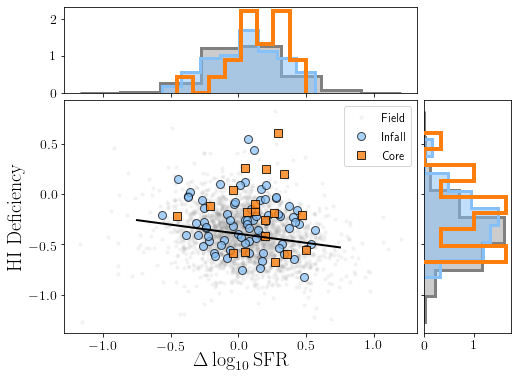

In [83]:
%%time
os.chdir('/home/rfinn/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --cutBT --BT 0.4 --minmass 9.7 --HIdef
b.compare_HIdef()

# Figure 10

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
$Field$$\ norm$: 0.544 + 0.008 - 0.008
$Field$$\ low$: 0.128 + 0.013 - 0.014
$Infall$$\ norm$: 0.377 + 0.031 - 0.032
$Infall$$\ low$: 0.035 + 0.014 - 0.022
$Core$$\ norm$: 0.286 + 0.048 - 0.054
$Core$$\ low$: 0.014 + 0.009 - 0.023


<Figure size 489.6x360 with 0 Axes>

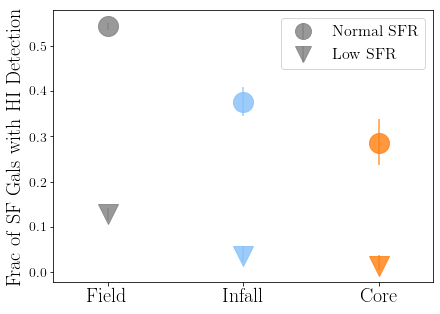

In [95]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
b.get_HIfrac_SFR_env(plotsingle=True)
figname1 = homedir+'/research/LCS/plots/frac-HI-SFR-env.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-SFR-env.pdf'
plt.savefig(figname1)
plt.savefig(figname2)

# Figure 11

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in parent sample =  404
number in low SFR sample =  107
number in normal SFR sample =  297
just checking, number of low sfr sample = 107
just checking, number of normal sfr sample = 297

delta R: normal vs suppressed
Anderson-Darling:  Anderson_ksampResult(statistic=-0.5976044208956893, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=

<Figure size 489.6x360 with 0 Axes>

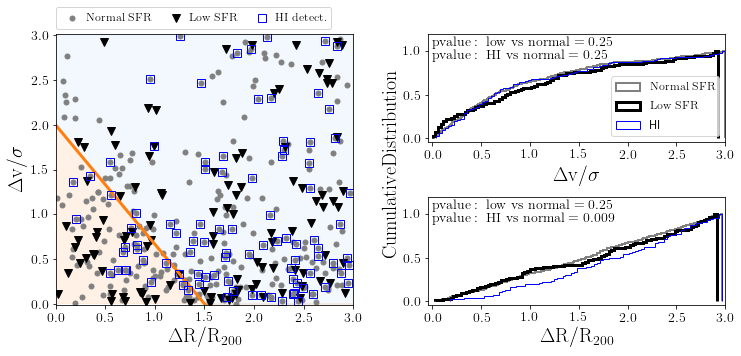

In [131]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals_2panel.pdf'
b.plot_dvdr_sfgals_2panel(figname1=figname1,figname2=figname2,HIflag=True)

# Make plot of fraction of suppressed galaxies vs Lx

* core only
* compare with field

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10


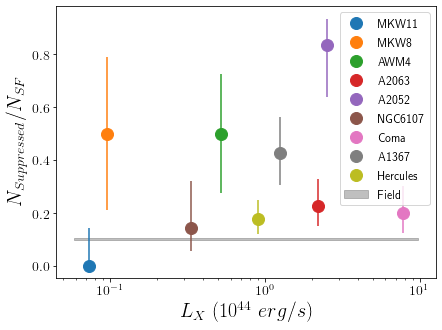

In [156]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7 --BT .4 --cutBT --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/frac-suppressed-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-suppressed-Lx.pdf'
b.frac_suppressed_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11


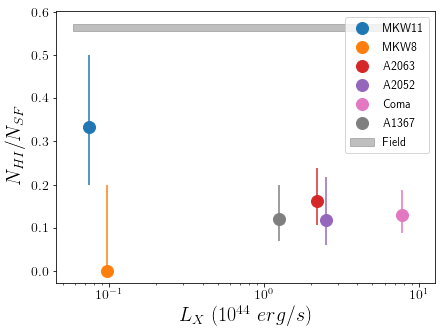

In [143]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/frac-HI-Lx.png'
figname2 = homedir+'/research/LCS/plots/frac-HI-Lx.pdf'
b.frac_HI_Lx()#figname1=figname1,figname2=figname2,HIflag=True)
plt.savefig(figname1)
plt.savefig(figname2)

# Number of galaxies with HI Detections

In [4]:
# number with HI detections
print('############################')
print('##   No B/T Cut')
print('############################')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
flag = b.gsw.HIdef['HIdef_flag'] & b.gsw_mass_sfr_flag
print('number of field galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.membflag & b.lcs_mass_sfr_flag
print('number of core galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.infallflag & b.lcs_mass_sfr_flag
print('number of infall galaxies w/HI detections = {}'.format(np.sum(flag)))

print()
print('############################')
print('##   with B/T Cut')
print('############################')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --cutBT --BT 0.4
flag = b.gsw.HIdef['HIdef_flag'] & b.gsw_mass_sfr_flag
print('number of field galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.membflag & b.lcs_mass_sfr_flag
print('number of core galaxies w/HI detections = {}'.format(np.sum(flag)))

flag = b.lcs.cat['HIdef_flag'] & b.lcs.infallflag & b.lcs_mass_sfr_flag
print('number of infall galaxies w/HI detections = {}'.format(np.sum(flag)))

############################
##   No B/T Cut
############################
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number of field galaxies w/HI detections = 3205
number of core galaxies w/HI detections = 23
number of infall galaxies w/HI detections = 94

############################
##   with B/T Cut
############################
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LC

# FIGURE 12 - FROM SIMULATIONS - SEPARATE NOTEBOOK

* Shows fraction of models with pvalues < 0.05 vs tau for a max infall time of 3 Gyr

* I can add the code here when we make the most clean version of this notebook

(array([501.,  12.,   3.,   0.,   1.,   3.,   1.,   1.,   0.,   1.]),
 array([4.47671350e-04, 8.33522647e+00, 1.66700053e+01, 2.50047841e+01,
        3.33395629e+01, 4.16743417e+01, 5.00091205e+01, 5.83438993e+01,
        6.66786781e+01, 7.50134569e+01, 8.33482357e+01]),
 <a list of 10 Patch objects>)

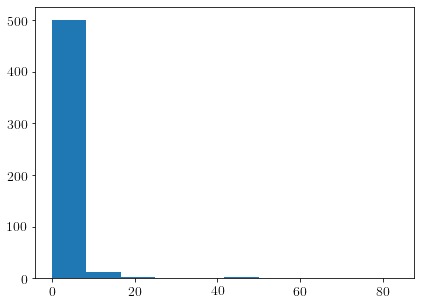

In [218]:
plt.figure()
flag = b.lcs.sizeratio > 0
plt.hist(b.lcs.sizeratio[flag])

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.40
Best-fit inter = -4.22
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.40+/-0.01
Best-fit inter = -4.22+/-0.11
number in sampleflag =  191 2759
number in membflag =  1164 2759
number in both =  99
number in both and in sfr/mstar cut =  66
fraction of core with dsfr below 0.3dex = 0.167 (11/66)
fraction of core with dsfr below 0.3dex = 0.151 (8/53)
just checking ... 65 52
0.006496057179138259
0.0037493775867791157
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff00975b390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff02d214e50>)

<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

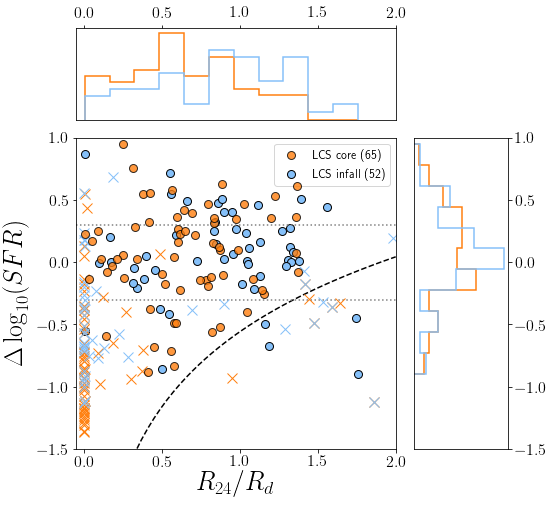

In [225]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef
figname1 = homedir+'/research/LCS/plots/dsfr-sizeratio.png'
figname2 = homedir+'/research/LCS/plots/dsfr-sizeratio.pdf'
b.plot_dsfr_sizeratio(outfile1=figname1,outfile2=figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.4
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1626 1626 1626 1626
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.47
Best-fit inter = -4.88
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.47+/-0.01
Best-fit inter = -4.88+/-0.10
number in sampleflag =  155 1626
number in membflag =  591 1626
number in both =  80
number in both and in sfr/mstar cut =  54
fraction of core with dsfr below 0.3dex = 0.148 (8/54)
fraction of core with dsfr below 0.3dex = 0.089 (4/45)
just checking ... 53 45
0.0334145746375488
0.0037493775867791157
############################################################# 
KS test comparising gal

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff01f4abb10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff00a48db10>)

<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

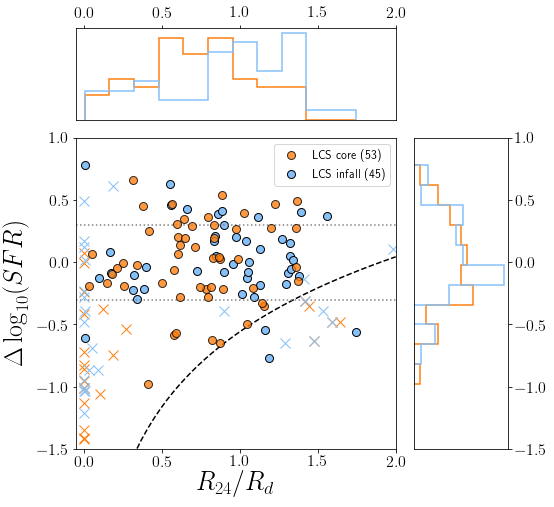

<Figure size 489.6x360 with 0 Axes>

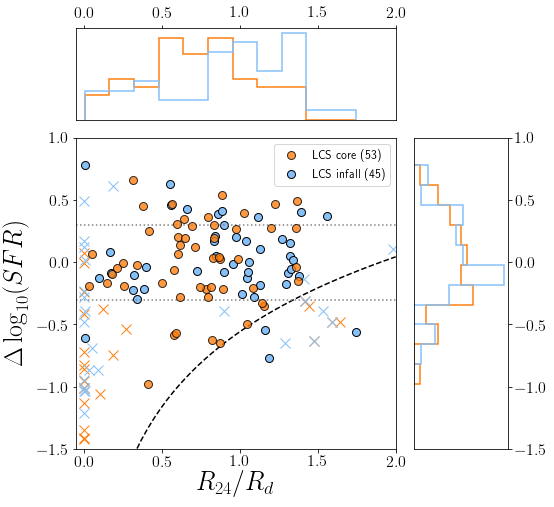

In [226]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --minmass 9.7  --ellip .75 --HIdef --cutBT --BT 0.4
figname1 = homedir+'/research/LCS/plots/dsfr-sizeratio-BT0p4.png'
figname2 = homedir+'/research/LCS/plots/dsfr-sizeratio-BT0p4.pdf'
b.plot_dsfr_sizeratio(outfile1=figname1,outfile2=figname2)
b.plot_dsfr_sizeratio()

# testing output of ks vs AD test


In [7]:
from scipy.stats import ks_2samp, anderson_ksamp

In [9]:
# 
x = np.random.random(50)
y = np.random.random(50)

ks_output = ks_2samp(x,y)
ad_output = anderson_ksamp([x,y])

In [18]:
print('1: ',ks_output)
print(ad_output)
print()
print('2: ',ks_output[0],ks_output[1])
print()
print('3: ',ad_output[0],ad_output[2])

1:  Ks_2sampResult(statistic=0.22, pvalue=0.17858668181221732)
Anderson_ksampResult(statistic=1.155528210621862, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.10877153617125189)

2:  0.22 0.17858668181221732

3:  1.155528210621862 0.10877153617125189


# Testing to see if we are picking up passive galaxies

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.55
Best-fit inter = -5.60
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.55+/-0.01
Best-fit inter = -5.60+/-0.10
number in lcs sample =  87
number in gsw sample =  7580
just checking ... 7580 87
9.701
9.702
############################################################ 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 8.294e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.26
p-vale = 8.891e-06 (prob that samples are fro

<Figure size 489.6x360 with 0 Axes>

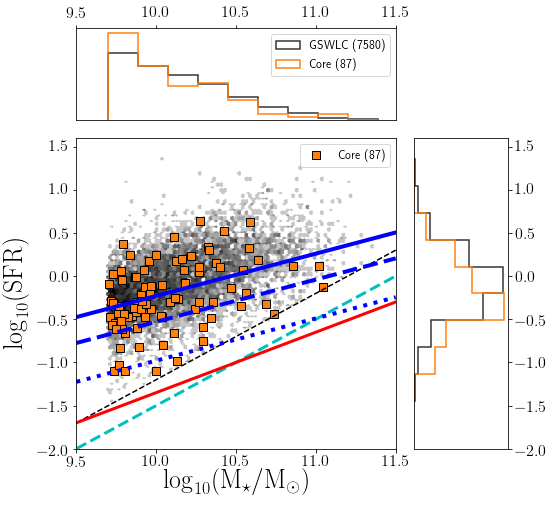

In [86]:

os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -11.2 --cutBT --BT .3



flag = b.lcs.membflag #& irflag 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut1-e0p75.png'
ax1=b.plot_sfr_mstar(lcsflag=flag,coreflag=True,plotMS=False,plotlegend=False,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True,marker2='s')

#print("")
#print("")
#flag = b.lcs.infallflag #& irflag
#outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.pdf'
#outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut1-e0p75.png'
xline=np.linspace(9.5,11.5,100)
yline=-11.5+xline
ax1.plot(xline,yline,'c--',lw=3)
#ax1.plot(xline,xline-11.1,'m-',lw=3)
ms = .49*xline-5.13
ax1.plot(xline,ms,'b-',lw=4)
ax1.plot(xline,ms-.3,'b--',lw=4)
ax1.plot(xline,ms-.75,'b:',lw=4)
# test line
testcut = .7*(xline-10.5)-1
ax1.plot(xline,testcut,'r-',lw=3)

In [48]:
x = b.gsw.cat['logMstar']
y = b.gsw.cat['logSFR']

In [49]:
fieldtab = Table([x,y],names=['logMstar','logSFR'])

In [50]:
os.getcwd()

'/home/rfinn/research/LCS/plots'

In [51]:
fieldtab.write('fieldsample.fits',format='fits',overwrite=True)

In [7]:
from scipy.optimize import curve_fit
def gaussian(x,amplitude,center,sigma):
    return amplitude*(1/(sigma*(np.sqrt(2*np.pi))))*np.exp((-1.0/2.0)*((x-center)/sigma)**2)

In [8]:
def twogaussian(x_array, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

def gaussian1(x_array, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) 

In [9]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

In [37]:

os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/lcs_paper2_v2.py --ellip 0.75 --minmass 9.7 --minssfr -14 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.15
STD of full data = 0.16
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.51
Best-fit inter = -5.20
Width of the MS = 0.16 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.51+/-0.05
Best-fit inter = -5.20+/-0.48


<Figure size 489.6x360 with 0 Axes>

SFR-Mstar best fit line :  [ 0.60757208 -6.20463972]
sqrt of cov matrix =  [0.00909214 0.08698508]
average SFR of where gaussians overlap = -0.57
median SFR of where gaussians overlap = -0.57
median offset from MS = -0.49
median STD of MS = 0.22


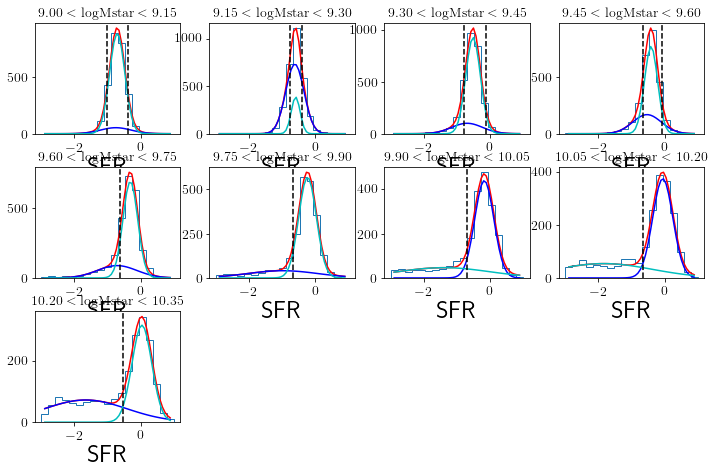

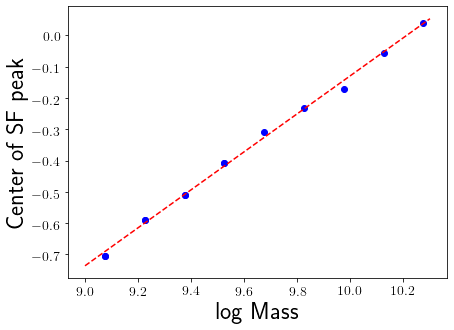

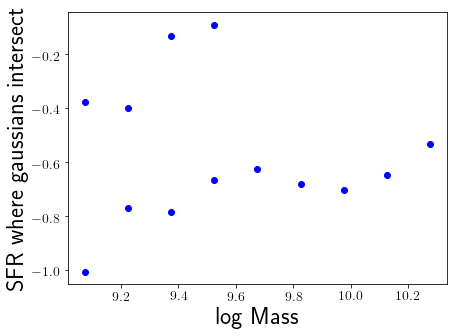

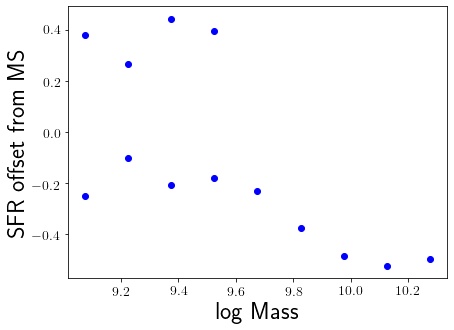

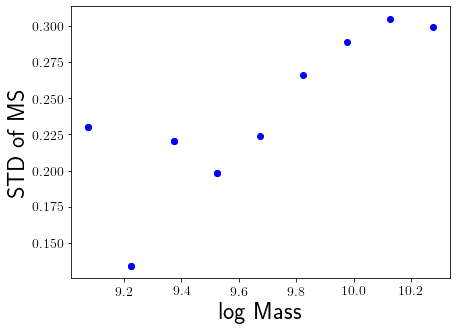

In [53]:
dm=.15
nbins=20
lowmass=9
highmass=10.3
minmass = np.arange(lowmass,highmass,dm)
maxmass = np.arange(lowmass+dm,highmass+dm,dm)
x = b.gsw.cat['logMstar']
y = b.gsw.cat['logSFR']
histbins=np.linspace(-3,1,nbins)
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=.3)
nplot=1
sfrcut_mass = []
sfrcut_sfr = []
lower_peak_sfr = []
higher_peak_sfr = []
higher_peak_std = []
for m1,m2 in zip(minmass,maxmass):
    plt.subplot(4,4,nplot)
    flag = (x > m1) & (x < m2)

    ybin,xbin_edge,t=plt.hist(y[flag],histtype='step',bins=histbins)
    xbin = (xbin_edge[:-1]+xbin_edge[1:])/2
    plt.title(r'$\rm {:.2f} < logMstar < {:.2f}$'.format(m1,m2),fontsize=14)
    division = .7*((m1+m2)/2-10)-1.2
    #plt.axvline(x=division, ls='--',c='k')
    xatmax= xbin[ybin == np.max(ybin)]

    popt,pcov = curve_fit(twogaussian,xbin,ybin)
    xline=np.linspace(min(xbin),max(xbin),50)
    yline = twogaussian(xline,*popt)
    #print("Gaussian 1: norm={:.2f}, center={:.2f}, std={:.2f}".format(popt[0],popt[1],popt[2]))
    #print("Gaussian 2: norm={:.2f}, center={:.2f}, std={:.2f}".format(popt[3],popt[4],popt[5]))
    
    #print("Gaussian 2: ",popt[3:])
    plt.plot(xline,yline,'r-')
    # plot the two gaussians individually
    plt.plot(xline,gaussian1(xline,popt[0],popt[1],popt[2]),'b')
    plt.plot(xline,gaussian(xline,popt[3],popt[4],popt[5]),'c-')
    # find intersection of two gaussians
    # solve(m1,m2,std1,std2)
    intersection = solve(popt[1],popt[4],popt[2],popt[5])
    for i,sfr in enumerate(intersection):
        if sfr < 0: # ignores bad fits
            plt.axvline(x=sfr, ls='--',c='k')
            sfrcut_mass.append(0.5*(m1+m2))
            sfrcut_sfr.append(sfr)
            #print('m1={:.2f}, m2={:.2f}, sfr={:.2f}'.format(m1,m2,i))
            
            lower_peak_sfr.append(np.min([popt[1],popt[4]]))
            higher_peak_sfr.append(np.max([popt[1],popt[4]]))
            if popt[1] > popt[4]:
                higher_peak_std.append(popt[2])
            else:
                higher_peak_std.append(popt[5])
    #print(intersection)
    
    #print(popt)

    #yline = 
    #plt.plot()
    plt.xlabel('SFR')
    nplot += 1
    

sfrcut_mass = np.array(sfrcut_mass)
sfrcut_sfr = np.array(sfrcut_sfr)
higher_peak_std = np.array(higher_peak_std)
higher_peak_sfr = np.array(higher_peak_sfr)
# plot peak of SF gaussian vs mass

plt.figure()
plt.plot(sfrcut_mass,higher_peak_sfr,'bo')
c,cov = np.polyfit(sfrcut_mass,higher_peak_sfr,1,cov=True)
xline = np.linspace(lowmass,highmass,100)
yline = np.polyval(c,xline)
plt.plot(xline,yline,'r--')
plt.xlabel('log Mass')
plt.ylabel('Center of SF peak')
print('SFR-Mstar best fit line : ',c)
print("sqrt of cov matrix = ",np.sqrt([cov[0][0],cov[1][1]]))


# plot 
plt.figure()
plt.plot(sfrcut_mass,sfrcut_sfr,'bo')
plt.xlabel('log Mass')
plt.ylabel('SFR where gaussians intersect')
print("average SFR of where gaussians overlap = {:.2f}".format(np.mean(sfrcut_sfr)))
print("median SFR of where gaussians overlap = {:.2f}".format(np.mean(sfrcut_sfr)))

# plot offset from the MS
plt.figure()
sfroffset = sfrcut_sfr - (0.61*sfrcut_mass - 6.2)
plt.plot(sfrcut_mass,sfroffset,'bo')
plt.xlabel('log Mass')
plt.ylabel('SFR offset from MS')

print('median offset from MS = {:.2f}'.format(np.median(sfroffset[sfrcut_mass > 9.7])))


# plot std from the MS
plt.figure()

plt.plot(sfrcut_mass,higher_peak_std,'bo')
plt.xlabel('log Mass')
plt.ylabel('STD of MS')

print('median STD of MS = {:.2f}'.format(np.median(higher_peak_std)))


SFR-Mstar best fit line :  [ 0.38802797 -3.99123167]
sqrt of cov matrix =  [0.07514237 0.7778619 ]
average SFR of where gaussians overlap = -0.56
median SFR of where gaussians overlap = -0.56
median offset from MS = -0.61
median STD of MS = 0.31


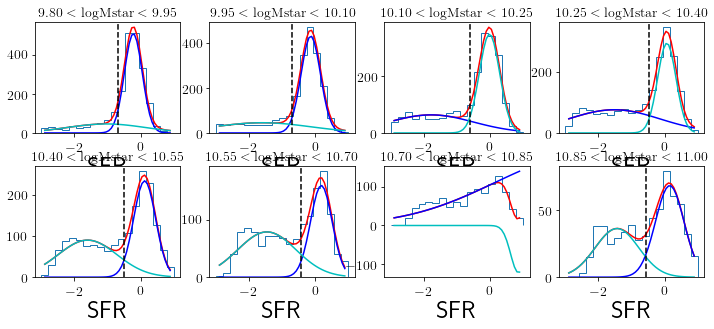

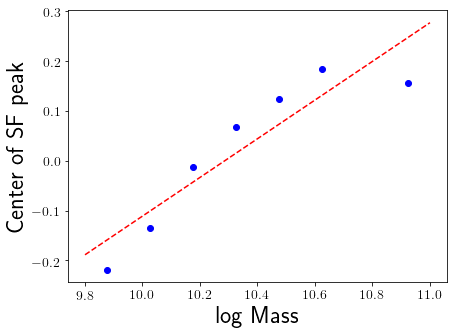

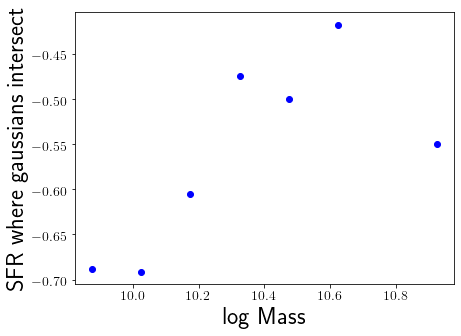

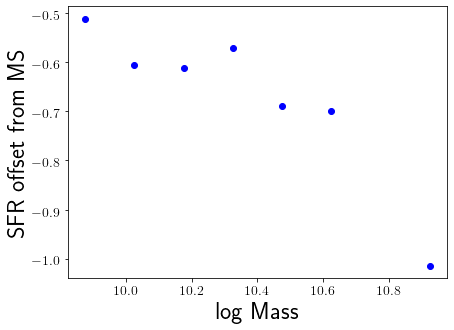

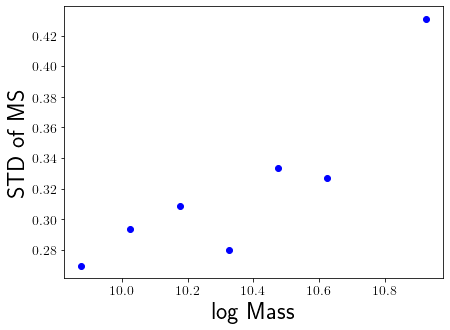

In [54]:
dm=.15
nbins=20
# use a different mass range to measure the offset wrt main sequence
lowmass=9.8
highmass=11
minmass = np.arange(lowmass,highmass,dm)
maxmass = np.arange(lowmass+dm,highmass+dm,dm)
x = b.gsw.cat['logMstar']
y = b.gsw.cat['logSFR']
histbins=np.linspace(-3,1,nbins)
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=.3)
nplot=1
sfrcut_mass = []
sfrcut_sfr = []
lower_peak_sfr = []
higher_peak_sfr = []
higher_peak_std = []
for m1,m2 in zip(minmass,maxmass):
    plt.subplot(4,4,nplot)
    flag = (x > m1) & (x < m2)

    ybin,xbin_edge,t=plt.hist(y[flag],histtype='step',bins=histbins)
    xbin = (xbin_edge[:-1]+xbin_edge[1:])/2
    plt.title(r'$\rm {:.2f} < logMstar < {:.2f}$'.format(m1,m2),fontsize=14)
    division = .7*((m1+m2)/2-10)-1.2
    #plt.axvline(x=division, ls='--',c='k')
    xatmax= xbin[ybin == np.max(ybin)]

    popt,pcov = curve_fit(twogaussian,xbin,ybin)
    xline=np.linspace(min(xbin),max(xbin),50)
    yline = twogaussian(xline,*popt)
    #print("Gaussian 1: norm={:.2f}, center={:.2f}, std={:.2f}".format(popt[0],popt[1],popt[2]))
    #print("Gaussian 2: norm={:.2f}, center={:.2f}, std={:.2f}".format(popt[3],popt[4],popt[5]))
    
    #print("Gaussian 2: ",popt[3:])
    plt.plot(xline,yline,'r-')
    # plot the two gaussians individually
    plt.plot(xline,gaussian1(xline,popt[0],popt[1],popt[2]),'b')
    plt.plot(xline,gaussian(xline,popt[3],popt[4],popt[5]),'c-')
    # find intersection of two gaussians
    # solve(m1,m2,std1,std2)
    intersection = solve(popt[1],popt[4],popt[2],popt[5])
    for i,sfr in enumerate(intersection):
        if sfr < 0: # ignores bad fits
            plt.axvline(x=sfr, ls='--',c='k')
            sfrcut_mass.append(0.5*(m1+m2))
            sfrcut_sfr.append(sfr)
            #print('m1={:.2f}, m2={:.2f}, sfr={:.2f}'.format(m1,m2,i))
            
            lower_peak_sfr.append(np.min([popt[1],popt[4]]))
            higher_peak_sfr.append(np.max([popt[1],popt[4]]))
            if popt[1] > popt[4]:
                higher_peak_std.append(popt[2])
            else:
                higher_peak_std.append(popt[5])
    #print(intersection)
    
    #print(popt)

    #yline = 
    #plt.plot()
    plt.xlabel('SFR')
    nplot += 1
    

sfrcut_mass = np.array(sfrcut_mass)
sfrcut_sfr = np.array(sfrcut_sfr)
higher_peak_std = np.array(higher_peak_std)
higher_peak_sfr = np.array(higher_peak_sfr)
# plot peak of SF gaussian vs mass

plt.figure()
plt.plot(sfrcut_mass,higher_peak_sfr,'bo')
c,cov = np.polyfit(sfrcut_mass,higher_peak_sfr,1,cov=True)
xline = np.linspace(lowmass,highmass,100)
yline = np.polyval(c,xline)
plt.plot(xline,yline,'r--')
plt.xlabel('log Mass')
plt.ylabel('Center of SF peak')
print('SFR-Mstar best fit line : ',c)
print("sqrt of cov matrix = ",np.sqrt([cov[0][0],cov[1][1]]))


# plot 
plt.figure()
plt.plot(sfrcut_mass,sfrcut_sfr,'bo')
plt.xlabel('log Mass')
plt.ylabel('SFR where gaussians intersect')
print("average SFR of where gaussians overlap = {:.2f}".format(np.mean(sfrcut_sfr)))
print("median SFR of where gaussians overlap = {:.2f}".format(np.mean(sfrcut_sfr)))

# plot offset from the MS
plt.figure()
sfroffset = sfrcut_sfr - (0.61*sfrcut_mass - 6.2)
plt.plot(sfrcut_mass,sfroffset,'bo')
plt.xlabel('log Mass')
plt.ylabel('SFR offset from MS')

print('median offset from MS = {:.2f}'.format(np.median(sfroffset[sfrcut_mass > 9.7])))


# plot std from the MS
plt.figure()

plt.plot(sfrcut_mass,higher_peak_std,'bo')
plt.xlabel('log Mass')
plt.ylabel('STD of MS')

print('median STD of MS = {:.2f}'.format(np.median(higher_peak_std)))


The best MS fit is 

  
  $$ logSFR = 0.58(logMstar)-6.01 $$

And we want to find a line parallel to this but that intersects where the two gaussians cross.

Best fitting for 2 gaussians is around $log SFR=0.58$.

At stellar mass of $logMstar = 10.8$:

$$-0.58 = 0.58*logMstar - X$$

$$ X = 0.58*logMstar + 0.58$$

$$ X = 0.58*10.8 + 0.58$$

$$ X = 5.684$$

So galaxies with 

$$ logSFR < 0.58*logMstar - 5.684$$ are low SFR galaxies.

To say this another way, galaxies that are 0.3263 dex below MS are low SFR galaxies. 


In [8]:
import numpy as np
# reading two sfrs from plot above
# these are where the two gaussians overlap
sfr = np.array([-.48,-.58])
# getting the corresponding stellar mass for each
mstar = np.array([10.4,10.8])
# solving for the intercept of the line that is
# parallel to MS but intersects point where 
# gaussians intersect
intercept = -1*(0.58*mstar-sfr)
print("intercept = ",intercept)
print(0.58*mstar+sfr)
print(6.01+intercept)

intercept =  [-6.512 -6.844]
[5.552 5.684]
[-0.502 -0.834]


So the fit to the MS is:

$$ logSFR = 0.58*logMstar - 6.01 $$

and the min SFR allowable in our sample is defined by the line parallel to the the MS, but 0.83 dex below it:

$$ logSFR > 0.58*logMstar - 6.84 $$

# To do before extended meeting on 12/17

1. potentially refitting the main sequence; (Rose)
  * before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  this is what we eyeballed from topcat.
1. using our double Gaussian fits to set up a boundary that is parallel to the MS, and offset based on the point where the two Gaussian fits cross.  this is not where the min is of the joint profile.  Need to plot each gaussian individually, then find where they cross (equal contribution from both populations), then fit a lit to these points vs logMstar; (Rose)
1. describing this process in the paper; (Greg and Benedetta)
1. Once we refit the main sequence, we need to recalculate the suppressed fractions and delta_sfr, and update the corresponding plots and numbers in the text.  (Rose)
1. implement mass matching throughout.  use Nfield/N_LCS to pick how many galaxies we select from field sample for mass matching. (Rose)
1. updating numbers in the paper accordingly; (Rose)
1. hopefully not having to update any of our conclusions:-) (Greg and Benedetta)
1. need to update for no BT cut and BT cut, and propagate. (Rose)
1. read through overleaf, and update discussion as necessary. (Greg and Benedetta)

### Refitting MS 

* before: everything above mass and sSFR limit
  * try fitting to everything, with salim sSFR cut to get a relationship closer to
  $$ logSFR = 0.6(logMstar-11) - 0.57 $$
  
  
  $$ logSFR = 0.6(logMstar)-11*.6 - 0.57 $$
  
  $$ logSFR = 0.6(logMstar)-7.17 $$
  this is what we eyeballed from topcat.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.49
Best-fit inter = -5.16
Width of the MS = 0.58 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.49+/-0.00
Best-fit inter = -5.16+/-0.03


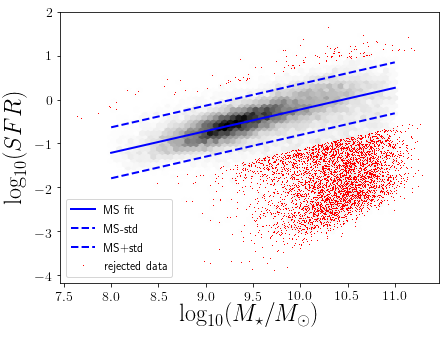

In [8]:
# changing starting position of first fit to what we got from topcat
# slope = .6
# intercept = -7.2

# 3 sigma cut, full mass range
os.chdir(homedir+'/research/LCS/plots/')
%matplotlib inline
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -15
plt.show()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.50
Best-fit inter = -5.26
Width of the MS = 0.59 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.50+/-0.00
Best-fit inter = -5.26+/-0.02


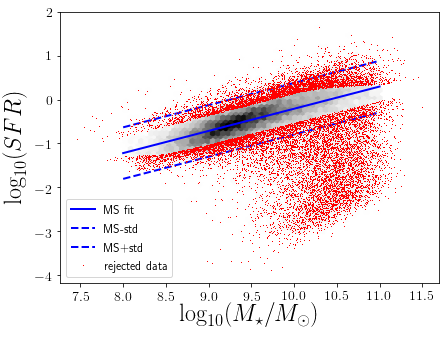

In [21]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -15

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.57
Best-fit inter = -5.90
Width of the MS = 0.54 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.57+/-0.00
Best-fit inter = -5.90+/-0.03


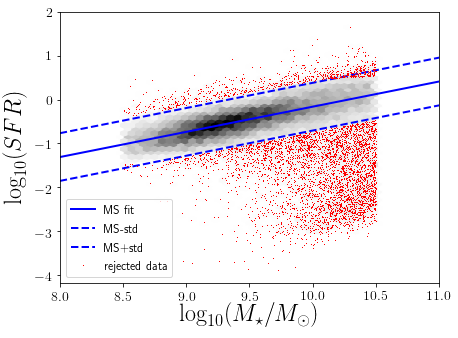

In [11]:
# changing starting position of first fit to what we got from topcat
# slope = .6
# intercept = -7.2

# 2.5 sigma cut
os.chdir(homedir+'/research/LCS/plots/')
%matplotlib inline
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -15
plt.show()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.16
STD of full data = 0.22
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.58
Best-fit inter = -6.01
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.58+/-0.01
Best-fit inter = -6.01+/-0.05


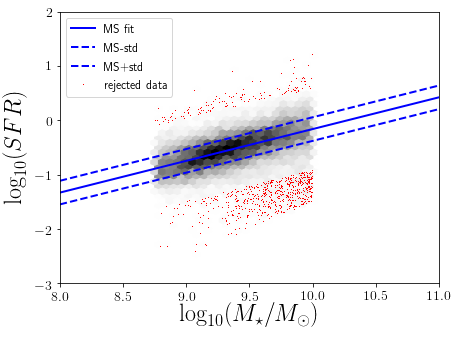

In [19]:
# changing starting position of first fit to what we got from topcat
# slope = .6
# intercept = -7.2

# 2.5 sigma cut, narrower mass range
os.chdir(homedir+'/research/LCS/plots/')
%matplotlib inline
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -11.5
plt.show()

Running on coma
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.16
STD of full data = 0.22
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.58
Best-fit inter = -6.01
Width of the MS = 0.22 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.58+/-0.01
Best-fit inter = -6.01+/-0.05


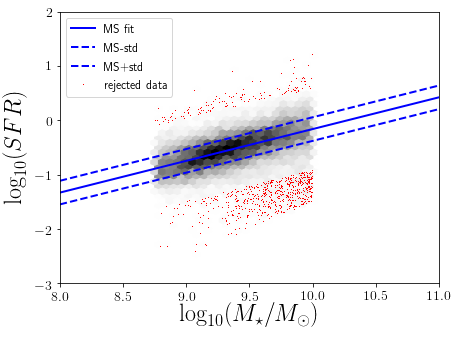

In [5]:
# changing starting position of first fit to what we got from topcat
# slope = .6
# intercept = -7.2

# 3 sigma cut, narrower mass range
os.chdir(homedir+'/research/LCS/plots/')
%matplotlib inline
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -11.5
plt.show()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.14
STD of full data = 0.17
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.62
Best-fit inter = -6.35
Width of the MS = 0.17 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.62+/-0.01
Best-fit inter = -6.35+/-0.05


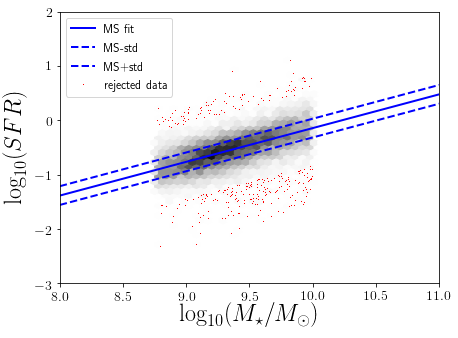

In [6]:
# with BT cut

# 3 sigma cut, narrower mass range
os.chdir(homedir+'/research/LCS/plots/')
%matplotlib inline
%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
plt.show()

# Updating Plots and Statistics

Using $B/T <= 0.3$

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
number of lines in LCS cat =  2955
got sb flag
2759 2759 2759 2759
STD of pruned data = 0.21
STD of full data = 0.27
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.30
Best-fit inter = -3.25
Width of the MS = 0.27 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.30+/-0.06
Best-fit inter = -3.25+/-0.59
number of core galaxies =  194
	 with size measurements =  --
number of infall galaxies =  433
	 with size measurements =  --
number of GSW galaxies =  11900


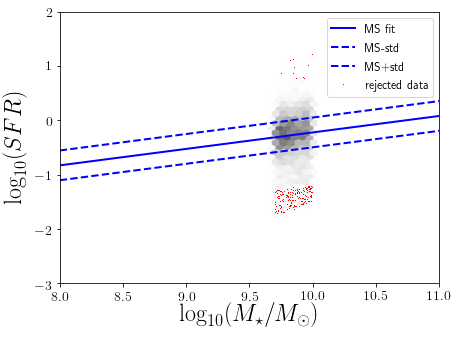

In [41]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
number of lines in LCS cat =  2955
inside LCS cut_BT, BT =  0.3
inside LCS cut_BT, BTkey =  __B_T_r
got sb flag
1305 1305 1305 1305
STD of pruned data = 0.15
STD of full data = 0.19
##################################
### FITTING WITH SIGMA CLIPPING 
##################################
Best-fit slope = 0.52
Best-fit inter = -5.32
Width of the MS = 0.19 (unclipped data)
###################################
### FITTING MS AFTER SIGMA CLIPPING 
###################################
Best-fit slope = 0.52+/-0.05
Best-fit inter = -5.32+/-0.52
number of core galaxies =  91
	 with size measurements =  --
number of infall galaxies =  231
	 with size measurements =  --
number of GSW galaxies =  7671


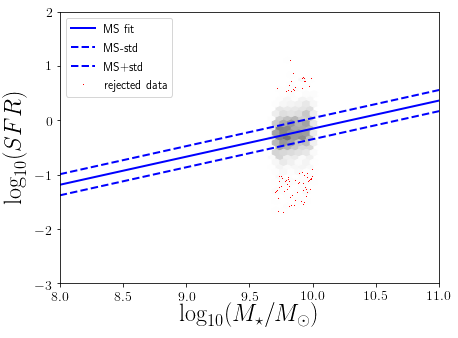

In [43]:
os.chdir(homedir+'/research/LCS/plots/')

%run ~/github/LCS/python/lcs_paper2_v2.py  --minmass 9.7 --ellip 0.75 --HIdef --minssfr -11.5 --cutBT --BT 0.3
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of infall galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )